In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import iplot
import os
import csv
#Read the all merged 2015-2022 data set
df_2015_2022 = pd.read_csv("./Happiness_data_from_2015_to_2022.csv")
#Read the merged mortality dataset
df_mortality = pd.read_csv("./mortality_merged.csv")
#Only select country,year and happiness score column from 2015-2022 dataset
df_sub = df_2015_2022.loc[:,["Country","year","Happiness Score"]]
#Select all the data from the years 2015 to 2018
df_sub = df_sub[df_sub["year"]<2019]
#change how the index and column so it fits into merged mortality dataset
new_df = df_sub.pivot(index='Country', columns='year', values='Happiness Score')
new_df = new_df.reset_index()
new_df = new_df.rename(columns={'index': 'Country'})
#Name the new columns being added to merged mortality dataset properlt
new_df.columns = ['Country', 'Happiness Score 2015', 'Happiness Score 2016', 'Happiness Score 2017','Happiness Score 2018']
#merge the data
merged_mortality_df = pd.merge(df_mortality, new_df, on=['Country'], how='inner')
#Find the different between each happines score each year and add a new column with the information to merged mortality dataset
merged_mortality_df['Diff Happiness Score 2019-2020'] = merged_mortality_df['Happiness Score 2020'] - merged_mortality_df['Happiness Score 2019']
merged_mortality_df['Diff Happiness Score 2018-2019'] = merged_mortality_df['Happiness Score 2019'] - merged_mortality_df['Happiness Score 2018']
merged_mortality_df['Diff Happiness Score 2017-2018'] = merged_mortality_df['Happiness Score 2018'] - merged_mortality_df['Happiness Score 2017']
merged_mortality_df['Diff Happiness Score 2016-2017'] = merged_mortality_df['Happiness Score 2017'] - merged_mortality_df['Happiness Score 2016']
merged_mortality_df['Diff Happiness Score 2015-2016'] = merged_mortality_df['Happiness Score 2016'] - merged_mortality_df['Happiness Score 2015']
merged_mortality_df = merged_mortality_df.sort_values(by='Happiness Score 2020', ascending=True)

merged_mortality_df

,Unnamed: 0,Country,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,...,Happiness Score 2020,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Diff Happiness Score 2019-2020,Diff Happiness Score 2018-2019,Diff Happiness Score 2017-2018,Diff Happiness Score 2016-2017,Diff Happiness Score 2015-2016
54,54,Afghanistan,3.892834e+07,3.804175e+07,5.628300,18.600000,0,1.106935,8.623237,0,...,2.5669,3.575,3.360,3.794,3.632,-0.6361,-0.429,-0.162,0.434,-0.215
64,64,Zimbabwe,1.486293e+07,1.464547e+07,2.442300,19.600000,0,0.645424,9.244180,0,...,3.2992,4.610,4.193,3.875,3.692,-0.3638,-0.029,-0.183,-0.318,-0.417
33,33,Tanzania,5.973421e+07,5.800546e+07,0.035200,17.700001,0,0.731803,9.153143,0,...,3.4762,3.781,3.666,3.349,3.303,0.2452,-0.072,-0.046,-0.317,-0.115
38,38,Malawi,1.912996e+07,1.862875e+07,0.988000,18.100000,0,0.667234,9.206980,0,...,3.5380,4.292,4.156,3.970,3.587,0.1280,-0.177,-0.383,-0.186,-0.136
27,27,India,1.380004e+09,1.366418e+09,10.778100,28.200001,0,0.936681,8.532171,0,...,3.5733,4.565,4.404,4.315,4.190,-0.4417,-0.175,-0.125,-0.089,-0.161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,101,Norway,5.421242e+06,5.347896e+06,8.042400,39.700001,0,2.675678,8.993008,0,...,7.4880,7.522,7.498,7.537,7.594,-0.0660,-0.040,0.057,0.039,-0.024
87,87,Iceland,3.412500e+05,3.613130e+05,8.498200,37.299999,1,1.649335,9.069892,0,...,7.5045,7.561,7.501,7.504,7.495,0.0105,-0.001,-0.009,0.003,-0.060
109,109,Switzerland,8.654618e+06,8.574832e+06,88.334305,43.099998,0,5.583522,9.078127,0,...,7.5599,7.587,7.509,7.494,7.487,0.0799,-0.007,-0.007,-0.015,-0.078
22,22,Denmark,5.792203e+06,5.818553e+06,22.409399,42.299999,0,3.953056,9.006084,0,...,7.6456,7.527,7.526,7.522,7.555,0.0456,0.045,0.033,-0.004,-0.001


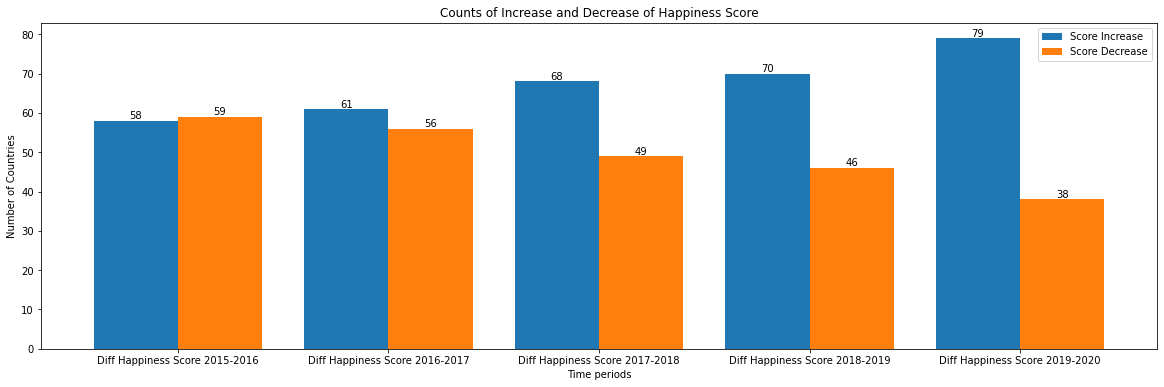

In [3]:
df = merged_mortality_df


# create a list of the column names to include in the graph
columns_to_include = ['Diff Happiness Score 2015-2016', 'Diff Happiness Score 2016-2017', 'Diff Happiness Score 2017-2018', 'Diff Happiness Score 2018-2019','Diff Happiness Score 2019-2020',]

# create a new DataFrame with just the selected columns
df_selected = df[columns_to_include]

# create a new DataFrame to hold the counts of positive and negative values
counts_df = pd.DataFrame(columns=['Score Increase', 'Score Decrease'])

# iterate over the selected columns and count the number of positive and negative values
for col in columns_to_include:
    pos_count = (df_selected[col] > 0).sum()
    neg_count = (df_selected[col] < 0).sum()
    counts_df.loc[col] = [pos_count, neg_count]

# create the bar graph
ax = counts_df.plot(kind='bar', width=0.8, figsize=(20, 6))

# set the title and axis labels
ax.set_title('Counts of Increase and Decrease of Happiness Score')
ax.set_xlabel('Time periods')
ax.set_ylabel('Number of Countries')

# set the x-axis tick labels to the column names
ax.set_xticklabels(columns_to_include, rotation=0)

# add labels to the bars
for p in ax.containers:
    ax.bar_label(p, label_type='edge')

# display the graph
plt.show()


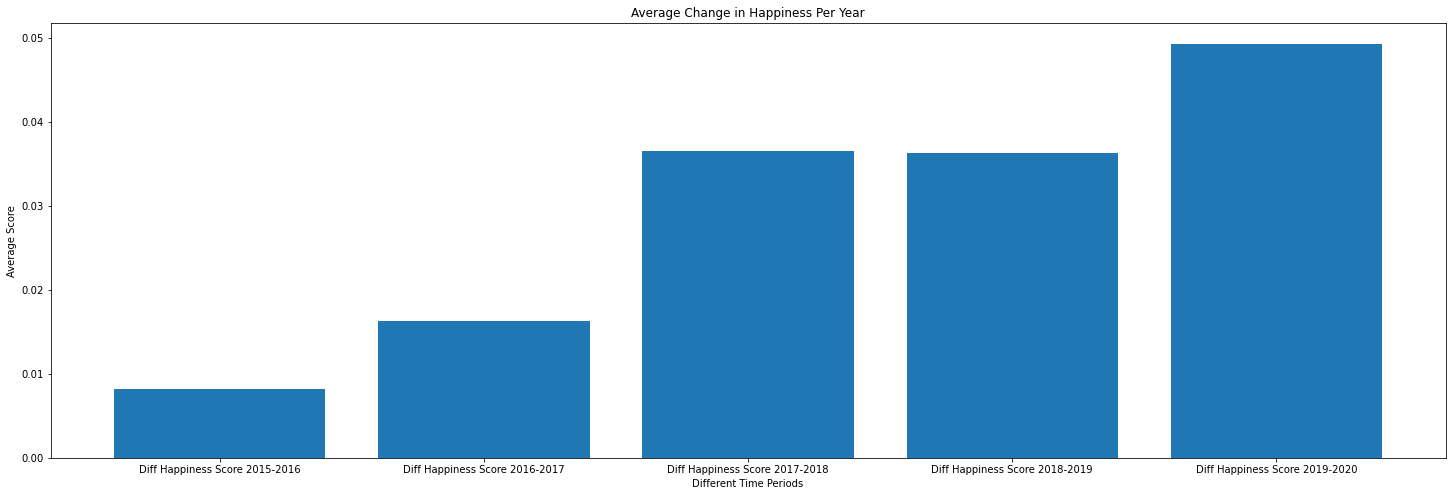

In [5]:
# Load the CSV file into a pandas DataFrame
df = merged_mortality_df

# Select the first two columns
cols_of_interest = ['Diff Happiness Score 2015-2016', 'Diff Happiness Score 2016-2017', 'Diff Happiness Score 2017-2018', 'Diff Happiness Score 2018-2019','Diff Happiness Score 2019-2020']
subset = df[cols_of_interest]

# Calculate the average of each column
avg = subset.mean()
plt.figure(figsize=(25, 8))

# Create a bar plot of the averages
plt.bar(avg.index, avg.values)

# Set the title and axis labels
plt.title('Average Change in Happiness Per Year')
plt.xlabel('Different Time Periods')
plt.ylabel('Average Score')
# Display the plot
plt.show()